##### Группа: М8О-406Б-21
##### Студент: Карнаков Н.Д.

# Лабораторная работа № 1-5

# Задача классификации

## 1. Выбор начальных условий

a. Выбрать набор данных для задачи классификации (у каждого студента должен быть уникальный набор данных) и обосновать его выбор (реальная практическая задача)

Для задачи классификации мною был выбран датасет с Kaggle - Pima Indians Diabetes Database.

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data (дата обращения - 05.01.2025)

Краткое описание датасета:

Этот датасет был создан Национальным институтом диабета, болезней органов пищеварения и почек. Его цель — диагностическое предсказание наличия или отсутствия диабета у пациента на основе ряда диагностических измерений, представленных в данных. При отборе записей из более крупной базы данных были применены определённые ограничения. В частности, все пациенты в этом датасете — женщины не моложе 21 года, принадлежащие к этнической группе индейцев пима.

Ключевые аргументы по выбору данного датасета:

1.   Задача диагностики диабета имеет большое практическое значение, так как диабет — это распространённое хроническое заболевание, требующее своевременного выявления и лечения;
2.   Работа с этим датасетом позволяет понять, как использовать машинное обучение для решения реальных медицинских задач, таких как предсказание наличия заболевания на основе медицинских данных.

Параметры, представленные в датасете:

**Pregnancies** — количество беременностей.  
**Glucose** — концентрация глюкозы в плазме через 2 часа после проведения перорального теста на толерантность к глюкозе.  
**BloodPressure** — диастолическое артериальное давление (в мм рт. ст.).  
**SkinThickness** — толщина кожной складки на трицепсе (в мм).  
**Insulin** — уровень инсулина в сыворотке крови через 2 часа (в мкЕд/мл).   
**BMI** — индекс массы тела (вес в кг / (рост в м)²).   
**DiabetesPedigreeFunction** — коэффициент наследственной предрасположенности к диабету.  
**Age** — возраст (в годах).  
**Outcome** — целевая переменная (0 или 1): 268 из 768 записей имеют значение 1, остальные — 0.  

### Загрузка датасета

Загружаем файл kaggle.json с ключом API для доступа к Kaggle.

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikitavorona","key":"a4ac2c86c1454a47d83c32856e07ff09"}'}

Создаём папку .kaggle в collab.
Копируем файл kaggle.json (содержащий API-токен для аутентификации в Kaggle) в эту папку.
Устанавливаем права доступа на файл kaggle.json, чтобы только текущий пользователь мог его читать и изменять (600).
Эти шаги необходимы для безопасной аутентификации и работы с API Kaggle.


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Устанавливаем библиотеку kaggle.
Она позволяет работать с API Kaggle и загружать датасеты.
Параметр -q отключает вывод подробной информации об установке.


In [4]:
!pip install -q kaggle

Загружаем набор данных Pima Indians Diabetes Database из Kaggle.

In [5]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

Dataset URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
License(s): CC0-1.0
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 15.3MB/s]


Распаковываем набор данных в каталог ./data

In [6]:
!unzip -q pima-indians-diabetes-database.zip -d ./data

Проверяем наличие файла с данными

In [7]:
import os

os.listdir('./data')

['diabetes.csv']

Импортируем библиотеку pandas для работы с табличными данными.
Считываем данные из файла 'diabetes.csv', расположенного по следующему пути:
diabetes.csv, и сохраняем их в переменную raw_data в виде DataFrame.
Отображаем первые 10 строк датасета с помощью метода head(20) для ознакомления с содержимым данных.

In [8]:
import pandas as pd

raw_data = pd.read_csv('/content/data/diabetes.csv')
raw_data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Выбор метрик и их обоснование

c. Выбрать метрики качества и обосновать их выбор

Для оценки качества моделей в задаче классификации были выбраны следующие метрики:

1. **Accuracy**: Общая доля правильно классифицированных примеров. Выбирается как базовая метрика для оценки, насколько модель хорошо справляется с задачей.  
2. **F1-score**: Учитывая несбалансированность классов, эта метрика позволяет учесть как точность (precision), так и полноту (recall), что важно для корректной оценки модели.  
3. **Матрица ошибок (Confusion Matrix)**: Для анализа распределения ошибок между классами и выявления тех категорий, которые модель путает.

Напишем функцию для оценки классификационной модели с использованием различных метрик.

accuracy_score, f1_score, classification_report из sklearn.metrics используются для вычисления точности, F1-мерки и подробного отчета о классификации, соответственно.

Если предсказанные значения (y_pred) или истинные метки (y_test) представлены как вероятности (с типом данных float), они приводятся к бинарному виду с использованием порога 0.5 (значения больше или равные 0.5 преобразуются в 1, остальные — в 0).

Для каждой метрики из списка metrics (например, 'accuracy', 'f1', 'classification_report') выполняется соответствующий расчет:
**Точность (accuracy)**: вычисляется с помощью accuracy_score.  
**F1-мерка (f1)**: вычисляется с помощью f1_score.  
**Отчет о классификации (classification_report)**: генерируется с помощью classification_report, который выводит подробную информацию по меткам, включая точность, полноту, F1-мерку и поддержку для каждого класса.


In [9]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

def print_evaluation(y_test, y_pred, metrics=['accuracy', 'f1', 'classification_report\n']):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)

    # Обработка вероятностей
    if np.issubdtype(y_pred.dtype, np.floating):
        threshold = 0.5
        y_pred = (y_pred >= threshold).astype(int)
    if np.issubdtype(y_test.dtype, np.floating):
        y_test = (y_test >= threshold).astype(int)

    # Вычисление метрик и сохранение в словаре
    results = {}
    for metric in metrics:
        if metric == 'accuracy':
            results['accuracy'] = accuracy_score(y_test, y_pred)
        elif metric == 'f1':
            results['f1'] = f1_score(y_test, y_pred)
        elif metric == 'classification_report\n':
            results['classification_report'] = classification_report(y_test, y_pred, zero_division=0)

    # Вывод результатов
    for metric, value in results.items():
        print("\n")
        print(f"{metric.capitalize()}: {value}\n")

Напишем функцию для визуализации матрицы ошибок (confusion matrix), которая используется для оценки качества классификации модели.

1. Импорт библиотек

seaborn и matplotlib.pyplot: библиотеки для визуализации данных. seaborn используется для построения тепловых карт, а matplotlib.pyplot — для создания графиков.  
confusion_matrix из sklearn.metrics: функция для вычисления матрицы ошибок.

2. Вычисление матрицы ошибок

Функция confusion_matrix(y_test, y_pred) вычисляет матрицу ошибок, которая отображает количество правильных и неправильных предсказаний для каждого класса. Результатом будет двумерный массив, где:

* Первая строка и первый столбец — это количество правильных и ошибочных классификаций для класса 0.  

* Вторая строка и второй столбец — это количество правильных и ошибочных классификаций для класса 1.

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(y_test, y_pred, labels=["Класс 0", "Класс 1"], cmap="Blues", fmt=".2f"):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=fmt, cmap=cmap, xticklabels=labels, yticklabels=labels)
    plt.xlabel("Предсказанная метка")
    plt.ylabel("Истинная метка")
    plt.title("Матрица ошибок")
    plt.show()

## 2. Создание бейзлайна и оценка качества

a. Обучить модели из sklearn для классификации для выбранных наборов данных  
b. Оценить качество моделей для классификации по выбранным метрикам на выбранных наборах данных

Выполним разделение данных на обучающую и тестовую выборки для дальнейшего обучения и оценки модели.

train_test_split из sklearn.model_selection: функция для разделения данных на обучающую и тестовую выборки.

Создается матрица признаков (raw_x), исключая столбец Outcome (целевая переменная) из набора данных. Параметр axis=1 указывает, что удаляется столбец.
Целевая переменная (raw_y) извлекается из столбца Outcome.

raw_x_train и raw_y_train: обучающие данные (80% от общего числа).  
raw_x_test и raw_y_test: тестовые данные (20% от общего числа).

test_size=0.2: задает долю тестовой выборки (20%).
random_state=42: фиксирует случайность, чтобы разделение данных было воспроизводимым при повторном запуске.

По итогу raw_x_train и raw_x_test содержат признаки (независимые переменные) для обучения и тестирования модели.

raw_y_train и raw_y_test содержат целевые метки (зависимая переменная Outcome) для обучения и проверки качества модели.




In [11]:
from sklearn.model_selection import train_test_split

raw_x = raw_data.drop('Outcome', axis=1)
raw_y = raw_data['Outcome']

raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(raw_x, raw_y, test_size=0.2, random_state=42)

### Обучение моделей
#### KNN

K-Nearest Neighbors (KNN) или метод k-ближайших соседей — это простой, но мощный алгоритм машинного обучения, используемый для задач классификации и регрессии.

Принцип работы:

1.   Обучение: KNN — это алгоритм «ленивого обучения», что означает, что он не строит явную модель во время обучения. Вместо этого он просто запоминает все обучающие данные.
2.   Предсказание:
    * Для нового объекта алгоритм находит k ближайших к нему объектов из обучающей выборки (соседей).
    * В задаче классификации новому объекту присваивается класс, который наиболее распространен среди его k соседей (голосовании большинством).



Реализуем классификацию с использованием алгоритма k-ближайших соседей (k-NN) и оценивает качество модели.

train_test_split: для разделения данных (уже использовалось ранее).
KNeighborsClassifier: для создания и обучения модели KNN.
numpy: для работы с массивами данных.

Создается объект классификатора KNN с числом соседей n_neighbors=7.

Модель обучается на обучающей выборке (raw_x_train и raw_y_train).

Модель предсказывает метки для тестовой выборки (raw_x_test).



In [30]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

modelKNN = KNeighborsClassifier(n_neighbors=7)
modelKNN.fit(raw_x_train,raw_y_train)

raw_y_pred = modelKNN.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred)



Accuracy: 0.6883116883116883



F1: 0.5862068965517241



Classification_report:               precision    recall  f1-score   support

           0       0.77      0.73      0.75        99
           1       0.56      0.62      0.59        55

    accuracy                           0.69       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.70      0.69      0.69       154




Выведем матрицу ошибок для KNN

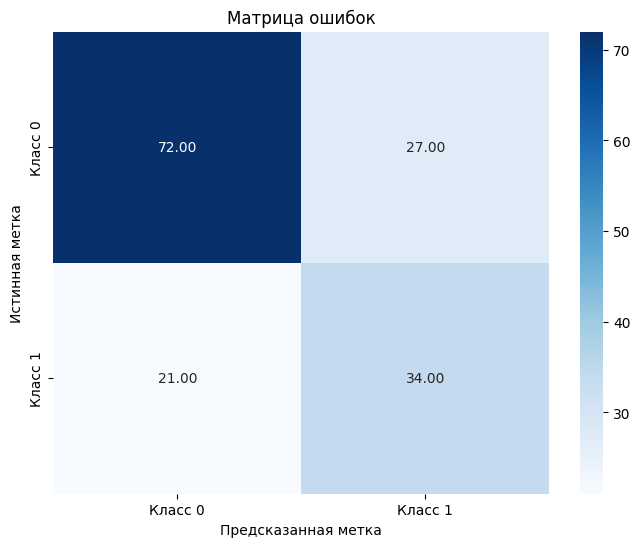

In [31]:
show_confusion_matrix(raw_y_test, raw_y_pred)

#### Логистическая регрессия

Логистическая регрессия — это статистический метод, используемый для прогнозирования вероятности принадлежности объекта к определенному классу. Это один из самых популярных алгоритмов машинного обучения для задач бинарной классификации, где нужно разделить объекты на два класса (например, "спам" или "не спам", "болен" или "здоров").

1. Импорт моделей:
    * LogisticRegression: реализация логистической регрессии для задач классификации.
    * LinearRegression: реализация линейной регрессии для задач регрессии.
2. Импорт метрики:
    * mean_squared_error: MSE (Mean Squared Error, среднеквадратичная ошибка) — это метрика, которая измеряет среднее квадратичное отклонение предсказанных значений от истинных значений. MSE показывает, насколько точно модель предсказывает значения целевой переменной. Чем меньше значение MSE, тем точнее модель.

 Сначала создается объект логистической регрессии с фиксированным значением random_state=42 для воспроизводимости и параметром max_iter=100000, который задает максимальное количество итераций для сходимости алгоритма. Затем модель обучается на обучающих данных с помощью метода fit, принимающего на вход обучающие признаки и метки (raw_x_train и raw_y_train). После этого модель предсказывает метки для тестовой выборки с использованием метода predict. Для оценки качества предсказаний вычисляется среднеквадратичная ошибка (MSE) между истинными и предсказанными метками, а также используются другие метрики классификации, такие как точность и F1-метрика, которые выводятся с помощью ранее определенной функции print_evaluation.


In [32]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error

modelLogisticRegression = LogisticRegression(random_state=42, max_iter=100000)
modelLogisticRegression.fit(raw_x_train,raw_y_train)

raw_y_pred2 = modelLogisticRegression.predict(raw_x_test)
print("MSE score:", mean_squared_error(raw_y_test, raw_y_pred2))
print_evaluation(raw_y_test, raw_y_pred2)

MSE score: 0.2532467532467532


Accuracy: 0.7467532467532467



F1: 0.6548672566371682



Classification_report:               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154




Выведем матрицу ошибок для логистической регрессии

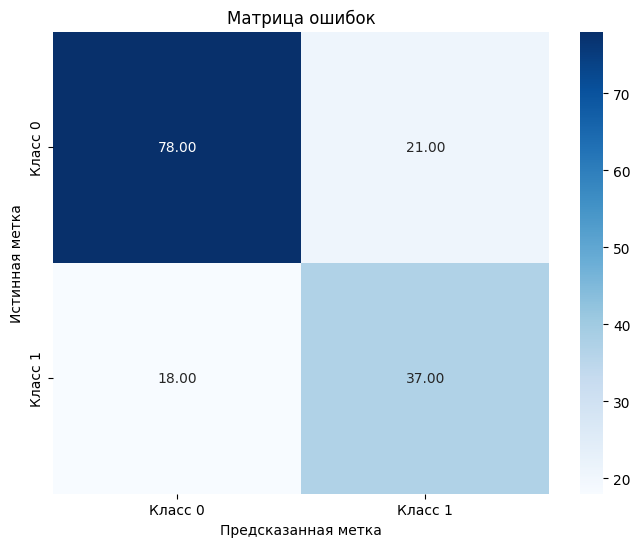

In [33]:
show_confusion_matrix(raw_y_test, raw_y_pred2)

#### Линейная регрессия

Линейная регрессия - это один из самых простых и широко используемых алгоритмов машинного обучения для решения задач регрессии. Цель регрессии - предсказать значение непрерывной целевой переменной на основе значений одной или нескольких входных переменных (признаков).

Сначала создается объект линейной регрессии с помощью класса LinearRegression. Затем модель обучается на обучающих данных, переданных в метод fit, где raw_x_train — обучающие признаки, а raw_y_train — соответствующие метки. После обучения модель предсказывает значения для тестовой выборки с помощью метода predict, используя тестовые признаки raw_x_test. Для оценки качества предсказаний вычисляется среднеквадратичная ошибка (MSE) между истинными значениями меток raw_y_test и предсказанными значениями raw_y_pred3. Также вызывается функция print_evaluation для вывода дополнительных метрик классификации, таких как точность и F1-метрика

In [34]:
modelLinearRegression = LinearRegression()
modelLinearRegression.fit(raw_x_train,raw_y_train)

raw_y_pred3 = modelLinearRegression.predict(raw_x_test)
print("MSE score:", mean_squared_error(raw_y_test, raw_y_pred3))
print_evaluation(raw_y_test, raw_y_pred3)

MSE score: 0.17104527280850104


Accuracy: 0.7597402597402597



F1: 0.6666666666666666



Classification_report:               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154




#### Решающее дерево

Решающее дерево (Decision Tree) — это алгоритм машинного обучения, используемый для задач классификации и регрессии. Он представляет собой древовидную структуру, где каждый узел представляет собой вопрос о данных, каждая ветвь — ответ на этот вопрос, а каждый лист — предсказание (класс или значение).

Сначала создается объект класса DecisionTreeClassifier с фиксированным значением random_state=42 для обеспечения воспроизводимости результатов. Затем модель обучается на обучающих данных с помощью метода fit, где raw_x_train представляет обучающие признаки, а raw_y_train — соответствующие метки. После обучения модель предсказывает метки для тестовой выборки с использованием метода predict и тестовых данных raw_x_test. Для оценки качества предсказаний вызывается функция print_evaluation, которая вычисляет и выводит ключевые метрики классификации, такие как точность, F1-метрика и отчет классификации.

In [35]:
from sklearn.tree import DecisionTreeClassifier

modelDecisionTree = DecisionTreeClassifier(random_state=42)
modelDecisionTree.fit(raw_x_train, raw_y_train)

raw_y_pred4 = modelDecisionTree.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred4)



Accuracy: 0.7467532467532467



F1: 0.6722689075630253



Classification_report:               precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154




Выведем матрицу ошибок для решающего дерева

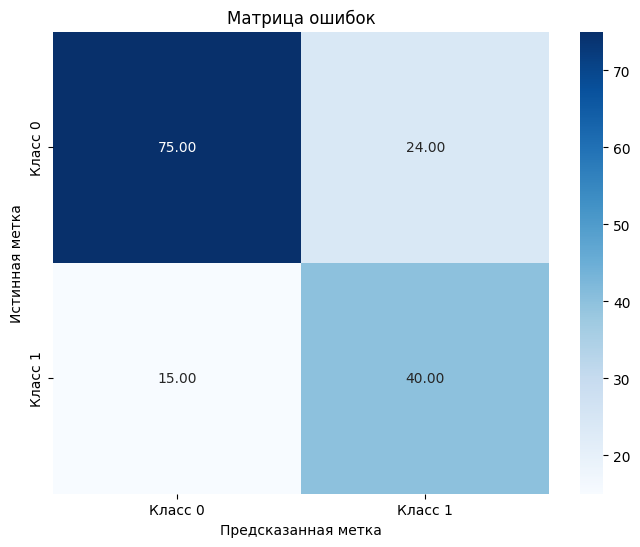

In [36]:
show_confusion_matrix(raw_y_test, raw_y_pred4)

#### Случайный лес

Случайный лес (Random Forest) — это мощный алгоритм машинного обучения, используемый для задач классификации и регрессии. Он относится к методам ансамблевого обучения, что означает, что он объединяет предсказания нескольких базовых моделей для получения более точного и стабильного результата.

Сначала создается объект класса RandomForestClassifier с параметром n_estimators=100, задающим количество деревьев в лесу, и фиксированным значением random_state=42 для воспроизводимости результатов. Затем модель обучается на обучающих данных с использованием метода fit, где raw_x_train — это обучающие признаки, а raw_y_train — соответствующие метки. После обучения модель предсказывает метки для тестовой выборки с помощью метода predict и тестовых данных raw_x_test. Для оценки качества предсказаний вызывается функция print_evaluation, которая рассчитывает и выводит ключевые метрики классификации, такие как точность, F1-метрика и отчет классификации.

In [37]:
from sklearn.ensemble import RandomForestClassifier

modelRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
modelRandomForest.fit(raw_x_train, raw_y_train)

raw_y_pred5 = modelRandomForest.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred5)



Accuracy: 0.7207792207792207



F1: 0.6126126126126126



Classification_report:               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154




Выведем матрицу ошибок для случайного леса

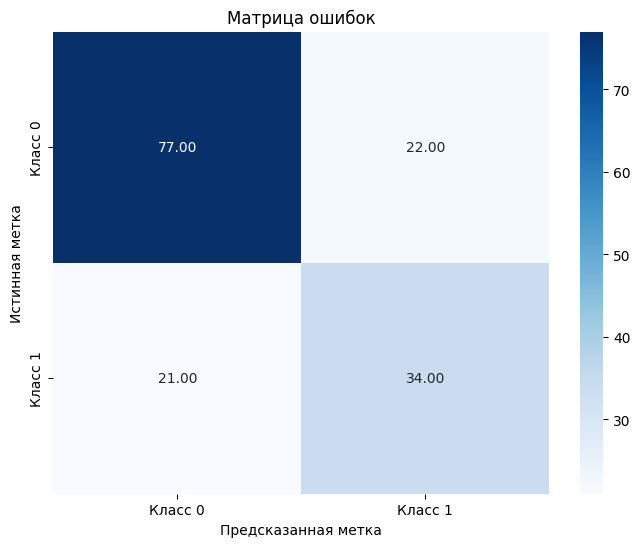

In [38]:
show_confusion_matrix(raw_y_test, raw_y_pred5)

#### Градиентный бустинг

Градиентный бустинг (Gradient Boosting) — это мощный алгоритм машинного обучения, используемый для задач классификации и регрессии. Как и случайный лес, он относится к методам ансамблевого обучения, но отличается способом построения ансамбля.

Сначала создается объект класса GradientBoostingClassifier с параметрами n_estimators=100, задающим количество деревьев в ансамбле, и learning_rate=0.1, определяющим скорость обучения модели. Также используется параметр random_state=42 для обеспечения воспроизводимости результатов. Затем модель обучается на обучающих данных с помощью метода fit, где raw_x_train — это обучающие признаки, а raw_y_train — соответствующие метки. После обучения модель предсказывает метки для тестовой выборки с использованием метода predict и тестовых данных raw_x_test. Для оценки качества предсказаний вызывается функция print_evaluation, которая вычисляет и выводит основные метрики классификации, такие как точность, F1-метрика и отчет классификации.

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

modelGradientBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
modelGradientBoosting.fit(raw_x_train, raw_y_train)

raw_y_pred6 = modelGradientBoosting.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred6)



Accuracy: 0.7402597402597403



F1: 0.6491228070175439



Classification_report:               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154




Выведем матрицу ошибок для градиентного бустинга

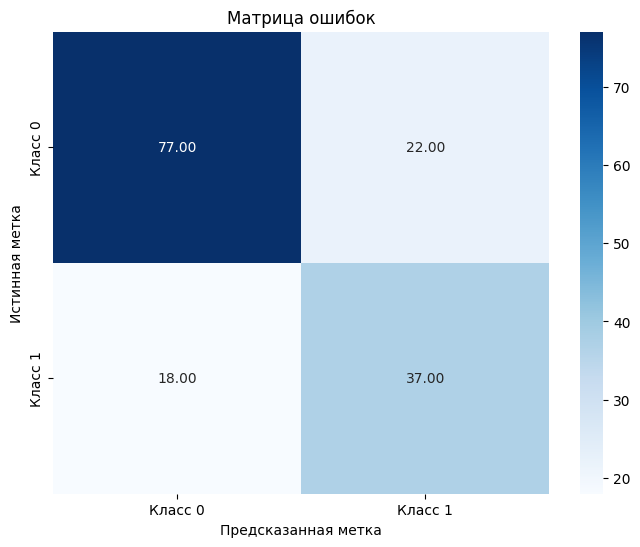

In [40]:
show_confusion_matrix(raw_y_test, raw_y_pred6)

## 3. Улучшение бейзлайна

a.	Сформулировать гипотезы (препроцессинг данных, визуализация данных, формирование новых признаков, подбор гиперпараметров на кросс-валидации и т.д.)  
b.	Проверить гипотезы  
c.	Сформировать улучшенный бейзлайн по результатам проверки гипотез  
d.	Обучить модели с улучшенным бейзлайном (для классификации и регрессии) для выбранных наборов данных  
e.	Оценить качество моделей с улучшенным бейзлайном (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  
f.	Сравнить результаты моделей с улучшенным бейзлайном в сравнении с результатами из пункта 2   
g.	Сделать выводы

#### Пункты a-c

Выполним препроцессинг данных, визуализируем некоторую информацию и исследуем датасет

In [41]:
df = pd.read_csv('/content/data/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Выполним вызов метода info() для объекта df, который представляет собой DataFrame в библиотеке pandas. Этот метод выводит информацию о структуре DataFrame, включая количество строк и столбцов, названия столбцов, их типы данных, количество ненулевых значений в каждом столбце, а также объем памяти, занимаемый DataFrame. Использование df.info() помогает быстро получить общее представление о данных, определить наличие пропущенных значений и понять типы данных для дальнейшей обработки.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Выполним проверку на наличие пропущенных значений в каждом столбце DataFrame df. Метод isnull() возвращает DataFrame той же формы, что и исходный, где каждый элемент является булевым значением: True, если значение в соответствующей ячейке пропущено (NaN), и False, если оно присутствует. Затем метод sum() суммирует количество пропущенных значений (где True считается за 1), возвращая количество пропущенных значений в каждом столбце. Это позволяет быстро определить, в каких столбцах имеются пропущенные данные и в каком количестве.

In [43]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Выполним построение гистограммы с плотностью распределения для столбца "Glucose" из DataFrame df с использованием библиотеки seaborn. Функция sns.distplot() отображает распределение значений столбца "Glucose", рисуя гистограмму с наложенной кривой плотности вероятности. Затем устанавливаются заголовок графика с помощью plt.title(), подпись оси X (глюкоза) через plt.xlabel(), и подпись оси Y (частота) через plt.ylabel(). В конце вызывается plt.show(), чтобы отобразить график на экране. Это позволит нам визуализировать распределение значений уровня глюкозы в выборке и анализировать его форму и характеристики.








<ipython-input-44-15c01ed2ed9b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Glucose"])


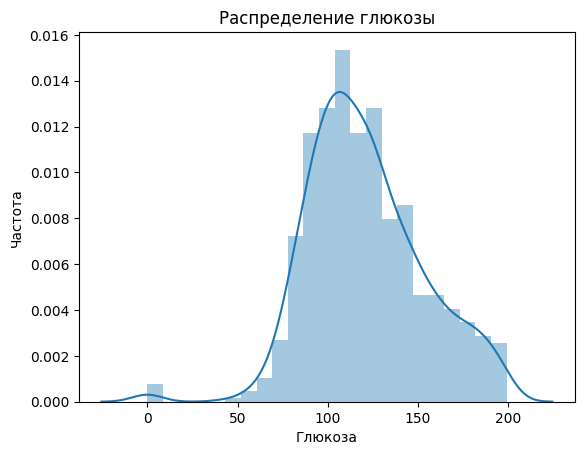

In [44]:
sns.distplot(df["Glucose"])
plt.title("Распределение глюкозы")
plt.xlabel("Глюкоза")
plt.ylabel("Частота")
plt.show()

Выполним построение гистограммы с плотностью распределения для столбца "BloodPressure" из DataFrame df с использованием библиотеки seaborn. Функция sns.distplot() отображает распределение значений столбца "BloodPressure", рисуя гистограмму и накладывая кривую плотности вероятности. Далее с помощью plt.title() устанавливается заголовок графика, который указывает на то, что изображено распределение давления. plt.xlabel() задает подпись для оси X, которая представляет собой диастолическое артериальное давление, а plt.ylabel() добавляет подпись для оси Y, указывающую на частоту встречаемости значений. В конце вызывается plt.show(), чтобы отобразить график на экране. Это поможет визуализировать распределение значений диастолического артериального давления в выборке.

<ipython-input-45-0fcfaf062007>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["BloodPressure"])


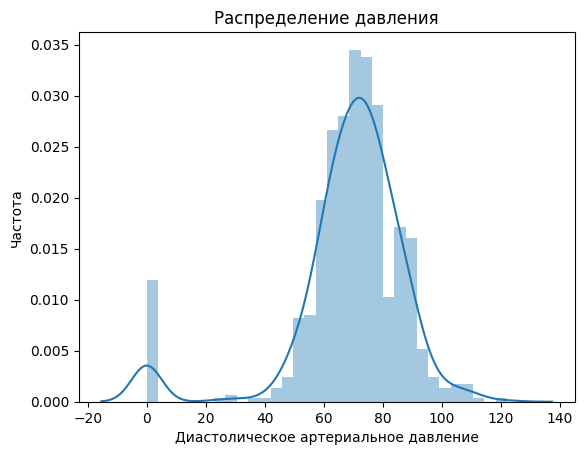

In [45]:
sns.distplot(df["BloodPressure"])
plt.title("Распределение давления")
plt.xlabel("Диастолическое артериальное давление")
plt.ylabel("Частота")
plt.show()

Построим гистограмму с плотностью распределения для столбца "Age" из DataFrame df с использованием библиотеки seaborn. Функция sns.distplot() отображает распределение значений столбца "Age", рисуя гистограмму с наложенной кривой плотности вероятности. После этого с помощью plt.title() устанавливается заголовок графика, который информирует о том, что на графике показано распределение возраста. Метод plt.xlabel() задает подпись для оси X, которая представляет возраст, а plt.ylabel() добавляет подпись для оси Y, которая указывает на частоту значений. В конце вызывается plt.show(), чтобы отобразить график на экране. Это поможет нам визуализировать, как распределены значения возраста в выборке.

<ipython-input-46-0d7e1abd7859>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


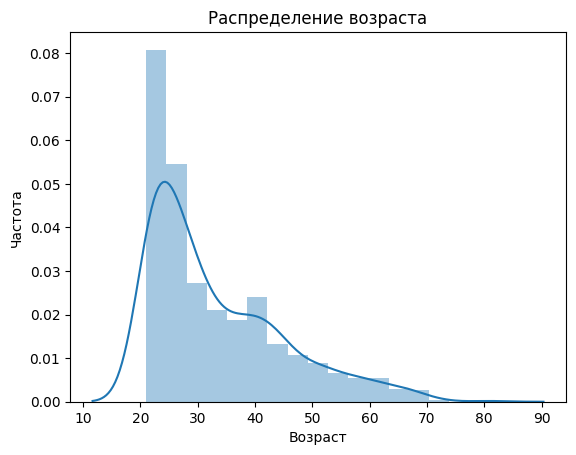

In [46]:
sns.distplot(df["Age"])
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.show()

Построим гистограмму с плотностью распределения для столбца "BMI" (индекс массы тела) из DataFrame df с использованием библиотеки seaborn. Функция sns.distplot() отображает распределение значений столбца "BMI", рисуя гистограмму и накладывая кривую плотности вероятности. Далее с помощью plt.title() устанавливается заголовок графика, который информирует, что на нем показано распределение индекса массы тела. Метод plt.xlabel() задает подпись для оси X, которая представляет собой индекс массы тела, а plt.ylabel() добавляет подпись для оси Y, указывающую на частоту значений. В конце вызывается plt.show(), чтобы отобразить график на экране. Это позволит нам визуализировать, как распределены значения индекса массы тела в выборке.








<ipython-input-47-2b95acdef5a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["BMI"])


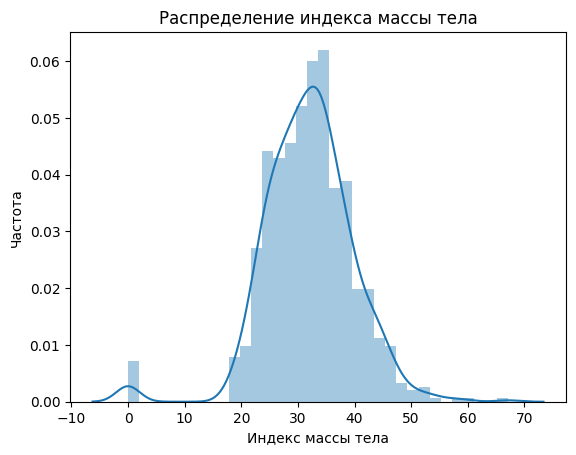

In [47]:
sns.distplot(df["BMI"])
plt.title("Распределение индекса массы тела")
plt.xlabel("Индекс массы тела")
plt.ylabel("Частота")
plt.show()

Построим столбчатую диаграмму для визуализации распределения количества беременностей (Pregnancies) с разбивкой по целевой переменной Outcome (наличие или отсутствие диабета) из DataFrame df с использованием функции sns.countplot() библиотеки seaborn. Аргумент x='Pregnancies' указывает на то, что по оси X будет отображаться количество беременностей, а параметр hue='Outcome' позволяет разделить данные по категориям целевой переменной (например, пациенты с диабетом и без диабета). Метод plt.title() задает заголовок графика, который информирует о том, что изображено распределение количества беременностей. С помощью plt.xlabel() добавляется подпись для оси X, указывающая на количество беременностей, а plt.ylabel() добавляет подпись для оси Y, которая обозначает частоту значений. В конце вызывается plt.show(), чтобы отобразить график на экране. Это поможет нам проанализировать, как количество беременностей связано с наличием диабета в выборке.

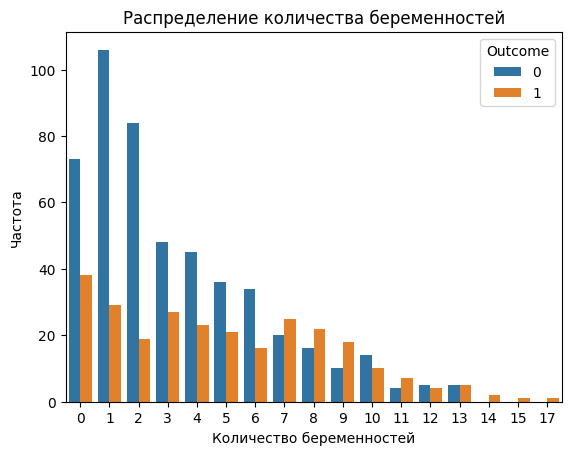

In [48]:
sns.countplot(x='Pregnancies', hue='Outcome', data=df)
plt.title("Распределение количества беременностей")
plt.xlabel("Количество беременностей")
plt.ylabel("Частота")
plt.show()


Выведем уникальные значения из столбца "SkinThickness" DataFrame df с помощью метода .unique(). Этот метод возвращает массив всех различных значений, которые встречаются в указанном столбце. Результат выводится на экран с помощью функции print(). Такой код позволяет быстро получить представление о том, какие уникальные значения содержатся в столбце "SkinThickness" (толщина кожной складки), что полезно для анализа данных и выявления возможных аномалий или ошибок в данных.

In [49]:
print(df.SkinThickness.unique())

[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]


Построим тепловую карту (heatmap) для корреляционной матрицы DataFrame df с использованием библиотеки seaborn. Метод df.corr() вычисляет корреляцию между числовыми переменными в DataFrame, создавая корреляционную матрицу. Функция sns.heatmap() отображает эту матрицу в виде тепловой карты, где цвета ячеек отражают степень корреляции между различными переменными. Аргумент annot=True добавляет числовые значения корреляций непосредственно на ячейки карты, что позволяет более наглядно увидеть величины корреляций. Тепловая карта поможет нам визуализировать взаимосвязи между переменными и может быть полезна для выявления сильных и слабых корреляций в данных.

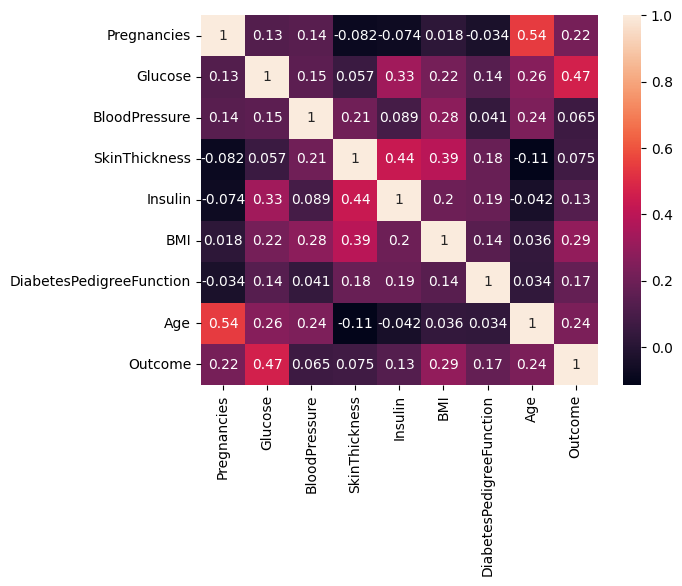

In [50]:
sns.heatmap(df.corr(), annot=True);


Построим круговую диаграмму (пироговый график) для отображения распределения классов в целевой переменной Outcome из DataFrame df. Сначала метод df.groupby('Outcome')['Outcome'].count() выполняет группировку данных по столбцу Outcome и подсчитывает количество записей для каждого класса (наличие и отсутствие диабета). Результат сохраняется в переменную graf. Далее, с помощью функции plt.pie(), строится круговая диаграмма. Параметр explode=[0.05, 0.1] указывает, что сектора диаграммы для классов "Отсутствие диабета" и "Наличие диабета" будут немного смещены, чтобы выделить их. Аргумент labels=['Отсутствие диабета', 'Наличие диабета'] задает подписи для каждого сектора. Параметр radius=1.5 увеличивает радиус диаграммы, а autopct='%1.1f%%' добавляет отображение процентных значений на каждом секторе с точностью до одной десятичной цифры. Это поможет нам наглядно представить распределение пациентов с диабетом и без диабета в выборке.

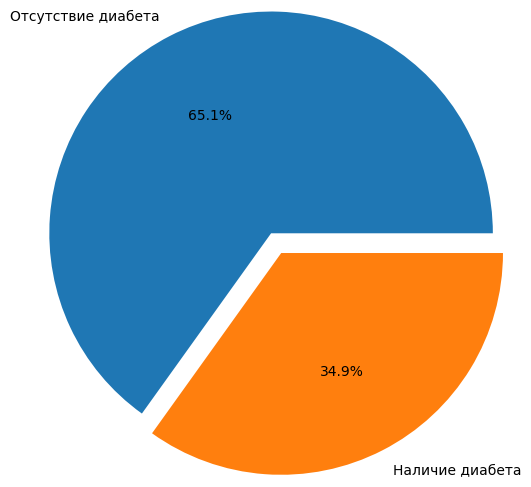

In [51]:
graf = df.groupby('Outcome')['Outcome'].count()
plt.pie(graf, explode=[0.05, 0.1], labels=['Отсутствие диабета', 'Наличие диабета'], radius=1.5, autopct='%1.1f%%');

При более детальном анализе данных было обнаружено, что хотя отсутствуют пропущенные значения, в столбце SkinThickness присутствуют нулевые значения, что не соответствует логике, так как толщина кожной складки не может быть равна нулю.


Поэтому заменим все нулевые значения в столбце SkinThickness DataFrame df на среднее значение этого столбца. Метод replace(0, df["SkinThickness"].mean()) выполняет замену: все элементы, равные нулю, заменяются на среднее значение столбца SkinThickness, вычисленное с помощью df["SkinThickness"].mean(). Это действие позволяет избежать некорректных данных (нулевых значений) и использовать более логичные данные для дальнейшего анализа.

In [52]:
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())

Выведем уникальные значения, содержащиеся в столбце SkinThickness DataFrame df. Метод unique() возвращает массив всех уникальных значений в указанном столбце, исключая повторяющиеся. Это позволяет быстро увидеть, какие различные значения присутствуют в столбце, и помогает в дальнейшем анализе данных, например, для выявления аномалий или для понимания распределения данных.

In [53]:
print(df.SkinThickness.unique())

[35.         29.         20.53645833 23.         32.         45.
 19.         47.         38.         30.         41.         33.
 26.         15.         36.         11.         31.         37.
 42.         25.         18.         24.         39.         27.
 21.         34.         10.         60.         13.         20.
 22.         28.         54.         40.         51.         56.
 14.         17.         50.         44.         12.         46.
 16.          7.         52.         43.         48.          8.
 49.         63.         99.        ]


Проведём нормализацию данных, чтобы привести все признаки к единому масштабу. Это поможет модели обучаться более эффективно.

Выполним нормализацию признаков данных и разделение их на обучающую и тестовую выборки. Сначала из DataFrame df выделяются признаки (x), удаляя столбец Outcome, который является целевой переменной, и сохраняется в отдельной переменной y. Далее используется MinMaxScaler из библиотеки sklearn.preprocessing, который масштабирует признаки в диапазон от 0 до 1. Метод fit_transform применяется к данным, чтобы нормализовать их.

После нормализации данные делятся на обучающую и тестовую выборки с помощью функции train_test_split. Параметр test_size=0.2 указывает, что 20% данных будет использовано для тестирования, а 80% — для обучения. Параметр random_state=42 обеспечивает воспроизводимость результатов, а stratify=y гарантирует, что пропорции классов в обучающей и тестовой выборках будут одинаковыми.








In [54]:
from sklearn.preprocessing import MinMaxScaler

x = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

При визуализации данных было обнаружено, что класс 0 составляет 66,1% набора данных, а класс 1 — 34,9%. Это указывает на дисбаланс классов. Исправим это

Используем метод SMOTE (Synthetic Minority Over-sampling Technique) для балансировки классов в обучающей выборке. SMOTE генерирует синтетические примеры для меньшинственного класса, чтобы сбалансировать количество образцов в каждом классе.

Сначала импортируется класс SMOTE из библиотеки imblearn.over_sampling. Затем создается объект smote, которому задается фиксированное значение random_state=42 для воспроизводимости результатов. Метод fit_resample применяется к обучающим данным (x_train и y_train), генерируя сбалансированную выборку, которая сохраняется в переменные x_resampled и y_resampled. Эти данные можно использовать для дальнейшего обучения модели.

In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Создадим новый DataFrame x_resampled_df из сбалансированных данных, полученных с помощью метода SMOTE. Для этого используется библиотека pandas, и создается DataFrame из массива x_resampled. В качестве столбцов DataFrame передаются имена признаков из исходных данных x.columns, чтобы сохранить структуру и название столбцов, соответствующих признакам. Результатом является DataFrame с теми же признаками, что и в исходных данных, но уже с добавленными синтетическими примерами для меньшинственного класса. Выводится этот DataFrame с помощью команды x_resampled_df.








In [56]:
x_resampled_df = pd.DataFrame(x_resampled, columns=x.columns)

x_resampled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,0.452261,0.508197,0.054348,0.050827,0.405365,0.214347,0.050000
1,0.294118,0.633166,0.639344,0.217391,0.026005,0.441133,0.154142,0.316667
2,0.117647,0.527638,0.475410,0.358696,0.111111,0.520119,0.062767,0.066667
3,0.058824,0.733668,0.459016,0.147135,0.000000,0.442623,0.207515,0.133333
4,0.000000,0.477387,0.524590,0.347826,0.124113,0.664680,0.122972,0.016667
...,...,...,...,...,...,...,...,...
795,0.018647,0.599337,0.704114,0.448565,0.268121,0.700988,0.171375,0.166667
796,0.302493,0.949033,0.516421,0.282609,0.389799,0.467842,0.223014,0.139266
797,0.056290,0.632733,0.594687,0.151706,0.029786,0.413099,0.084547,0.239367
798,0.000000,0.688011,0.499432,0.312779,0.166778,0.514955,0.172318,0.002585


### Пункты d-f. Обучение моделей с улучшенным бейзлайном и сравнение
#### KNN

Выполним обучение модели классификации с использованием алгоритма k ближайших соседей (K-Nearest Neighbors, KNN). Сначала создается объект модели knn с параметром n_neighbors=7, что означает использование 3 ближайших соседей для классификации. Затем модель обучается на сбалансированных данных x_resampled и y_resampled, которые были получены с помощью метода SMOTE для устранения проблемы несбалансированности классов. После обучения модель делает предсказания на тестовой выборке x_test, и результаты этих предсказаний сохраняются в переменной y_pred. В завершение вызывается функция print_evaluation, которая выводит метрики оценки модели, такие как точность, F1-скор и отчет по классификации, для сравнения предсказанных значений с истинными значениями из y_test.

In [57]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_resampled, y_resampled)
y_pred = knn.predict(x_test)

print_evaluation(y_test, y_pred)



Accuracy: 0.6558441558441559



F1: 0.5954198473282443



Classification_report:               precision    recall  f1-score   support

           0       0.81      0.62      0.70       100
           1       0.51      0.72      0.60        54

    accuracy                           0.66       154
   macro avg       0.66      0.67      0.65       154
weighted avg       0.70      0.66      0.66       154




Выведем матрицу ошибок для улучшенного бейзлайна KNN

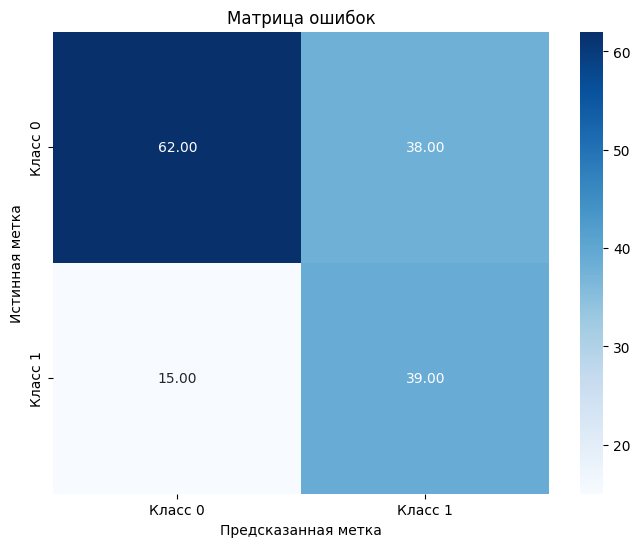

In [58]:
show_confusion_matrix(y_test, y_pred)

### Сравнение с прошлой моделью

Прошлые результаты:
  * Accuracy: 0.6883
  * F1: 0.5862

Новые результаты:
  * Accuracy: 0.6558
  * F1: 0.5954  

  
Вывод: Модель с улучшенным бейзлайном имеет немного более высокий F1-score, но ее точность (accuracy) немного ниже, чем у базовой модели KNN.  Улучшение F1-score при снижении точности может указывать на лучшее выделение меньших классов, но с потерей общей точности модели.

#### Логистическая регрессия

Используем алгоритм логистической регрессии для классификации. Сначала создается объект модели logistic_regression с параметром max_iter=100000, который устанавливает максимальное количество итераций для алгоритма. Затем модель обучается на сбалансированных данных, полученных после применения SMOTE, с помощью метода fit, где x_resampled — это признаки, а y_resampled — целевая переменная. После обучения модель делает предсказания на тестовой выборке x_test, и результаты предсказаний сохраняются в переменной y_pred2. Далее рассчитывается среднеквадратичная ошибка (MSE) между предсказанными и истинными значениями (y_test) с помощью функции mean_squared_error. В завершение вызывается функция print_evaluation, которая выводит метрики оценки модели, такие как точность, F1-скор и отчет по классификации.

In [59]:
logistic_regression = LogisticRegression(max_iter=100000)
logistic_regression.fit(x_resampled, y_resampled)

y_pred2 = logistic_regression.predict(x_test)
print("MSE score:", mean_squared_error(y_test, y_pred2))
print_evaluation(y_test, y_pred2)

MSE score: 0.2597402597402597


Accuracy: 0.7402597402597403



F1: 0.6610169491525424



Classification_report:               precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.61      0.72      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154




Выведем матрицу ошибок для улучшенного бейзлайна логистической регрессии

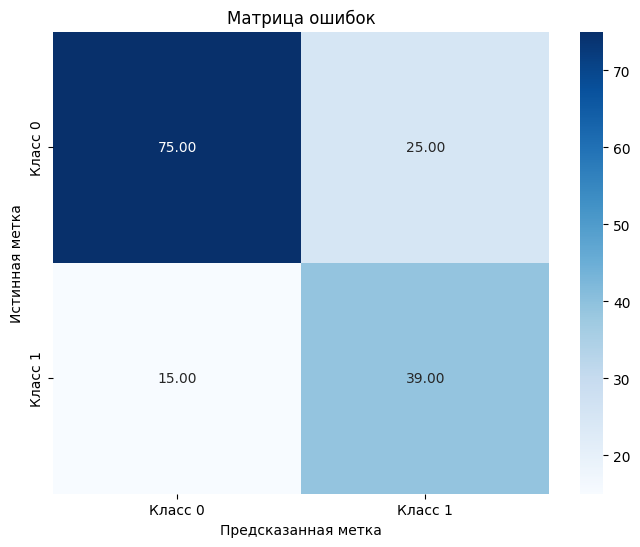

In [60]:
show_confusion_matrix(y_test, y_pred2)

### Сравнение с прошлой моделью

Прошлые результаты:
  * MSE: 0.2532
  * Accuracy: 0.7468
  * F1: 0.6549
  
Новые результаты:
  * MSE: 0.2597
  * Accuracy: 0.7403
  * F1: 0.6610

 Вывод: Повышение F1-score с небольшой потерей точности и увеличением MSE может указывать на улучшение способности модели работать с дисбалансом классов, но за счет общей стабильности модели.

#### Линейная регрессия

Испольщуем метод линейной регрессии для классификации. Сначала создается объект модели linear_regression, который затем обучается на сбалансированных данных, полученных с помощью SMOTE, с использованием метода fit. Признаки для обучения передаются в переменной x_resampled, а целевая переменная — в y_resampled. После обучения модель делает предсказания на тестовой выборке x_test, и результаты сохраняются в переменной y_pred3. Далее вычисляется среднеквадратичная ошибка (MSE) между предсказанными значениями и истинными метками с помощью функции mean_squared_error. В конце вызывается функция print_evaluation, которая выводит различные метрики оценки модели, такие как точность, F1-скор и отчет по классификации.

In [61]:
linear_regression = LinearRegression()
linear_regression.fit(x_resampled, y_resampled)

y_pred3 = linear_regression.predict(x_test)
print("MSE score:", mean_squared_error(y_test, y_pred3))
print_evaluation(y_test, y_pred3)

MSE score: 0.1809370373315439


Accuracy: 0.7337662337662337



F1: 0.6434782608695652



Classification_report:               precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154




### Сравнение с прошлой моделью

Прошлые результаты:
  * MSE: 0.1710
  * Accuracy: 0.7597
  * F1: 0.6667

Новые результаты:
  * MSE: 0.6610
  * Accuracy: 0.7338
  * F1: 0.6435

Вывод:  Ухудшение всех метрик у линейной регрессии с улучшенным бейзлайном указывает на ухудшение общей производительности модели, что может быть связано с тем, что линейная модель плохо справляется с таким улучшением.

#### Решающее дерево

Используем классификатор на основе дерева решений для решения задачи классификации. Сначала создается объект модели decision_tree, где в качестве критерия разделения выбирается "энтропия", а для воспроизводимости результатов устанавливается фиксированное значение random_state. Модель обучается на сбалансированных данных, полученных с помощью SMOTE, с использованием метода fit, где признаки передаются в переменной x_resampled, а целевая переменная — в y_resampled. После обучения модель делает предсказания на тестовой выборке x_test, и результаты сохраняются в переменной y_pred4. Затем вызывается функция print_evaluation, которая выводит метрики оценки модели, такие как точность, F1-скор и отчет по классификации, чтобы оценить производительность модели на тестовых данных.








In [62]:
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=42)
decision_tree.fit(x_resampled, y_resampled)
y_pred4 = decision_tree.predict(x_test)
print_evaluation(y_test, y_pred4)



Accuracy: 0.7532467532467533



F1: 0.6607142857142857



Classification_report:               precision    recall  f1-score   support

           0       0.82      0.79      0.81       100
           1       0.64      0.69      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154




Выведем матрицу ошибок для улучшенного бейзлайна решающего дерева

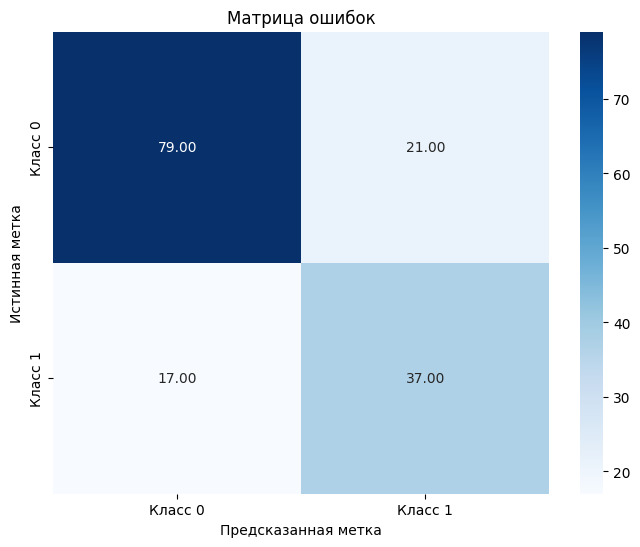

In [63]:
show_confusion_matrix(y_test, y_pred4)

### Сравнение с прошлой моделью

Прошлые результаты:

  * Accuracy: 0.7468
  * F1: 0.6723

Новые результаты:
  * Accuracy: 0.7532
  * F1: 0.6607

Вывод: Улучшение точности при снижении F1-score может указывать на потерю способности модели работать с менее представленными классами, что может уменьшить ее способность к правильной классификации.

#### Случайный лес

Используем классификатор случайного леса для решения задачи классификации. Сначала создается объект модели random_forest с параметром n_estimators=100, что указывает на использование 100 деревьев в лесу, и фиксируется значение random_state=42 для обеспечения воспроизводимости результатов. Модель обучается на сбалансированных данных, полученных с помощью SMOTE, с использованием метода fit, где признаки передаются в переменной x_resampled, а целевая переменная — в y_resampled. После обучения модель делает предсказания на тестовой выборке x_test, и результаты сохраняются в переменной y_pred5. Затем вызывается функция print_evaluation, которая выводит метрики оценки модели, такие как точность, F1-скор и отчет по классификации, для анализа производительности модели на тестовых данных.








In [64]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_resampled, y_resampled)
y_pred5 = random_forest.predict(x_test)
print_evaluation(y_test, y_pred5)



Accuracy: 0.7337662337662337



F1: 0.6495726495726496



Classification_report:               precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154




Выведем матрицу ошибок для улучшенного бейзлайна случайного леса

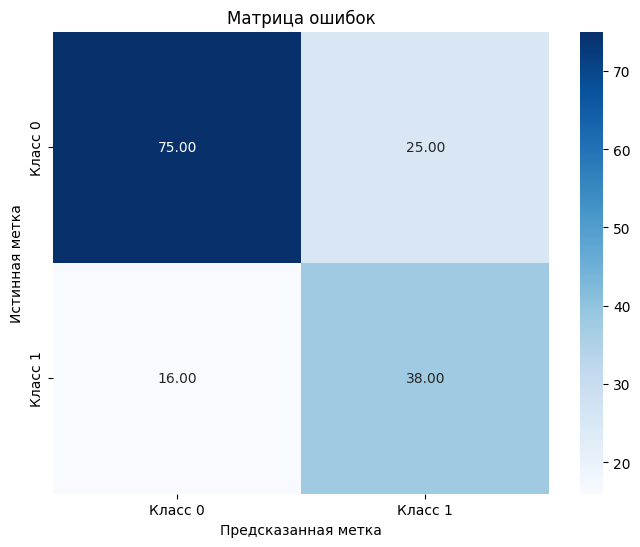

In [65]:
show_confusion_matrix(y_test, y_pred5)

### Сравнение с прошлой моделью

Прошлые результаты:

  * Accuracy: 0.7208
  * F1: 0.6126

Новые результаты:

  * Accuracy: 0.7338
  * F1: 0.6496

Вывод: Улучшение как точности, так и F1-score говорит о том, что улучшенный бейзлайн способствует лучшему обучению модели, улучшая как общую точность, так и способность к выделению важных классов.

#### Градиентный бустинг

Используем классификатор градиентного бустинга для решения задачи классификации. Сначала создается объект модели gradient_boosting с параметрами n_estimators=100, что указывает на использование 100 базовых моделей (деревьев), и learning_rate=0.1, который контролирует шаг обновления в процессе обучения, а также фиксируется значение random_state=42 для обеспечения воспроизводимости. Модель обучается на сбалансированных данных, полученных с помощью SMOTE, с использованием метода fit, где признаки передаются в переменной x_resampled, а целевая переменная — в y_resampled. После обучения модель делает предсказания на тестовой выборке x_test, и результаты сохраняются в переменной y_pred6. Затем вызывается функция print_evaluation, которая выводит метрики оценки модели, такие как точность, F1-скор и отчет по классификации, для анализа производительности модели на тестовых данных.

In [66]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting.fit(x_resampled, y_resampled)
y_pred6 = gradient_boosting.predict(x_test)
print_evaluation(y_test, y_pred6)



Accuracy: 0.7662337662337663



F1: 0.6896551724137931



Classification_report:               precision    recall  f1-score   support

           0       0.85      0.78      0.81       100
           1       0.65      0.74      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154




Выведем матрицу ошибок для улучшенного бейзлайна градиентного бустинга

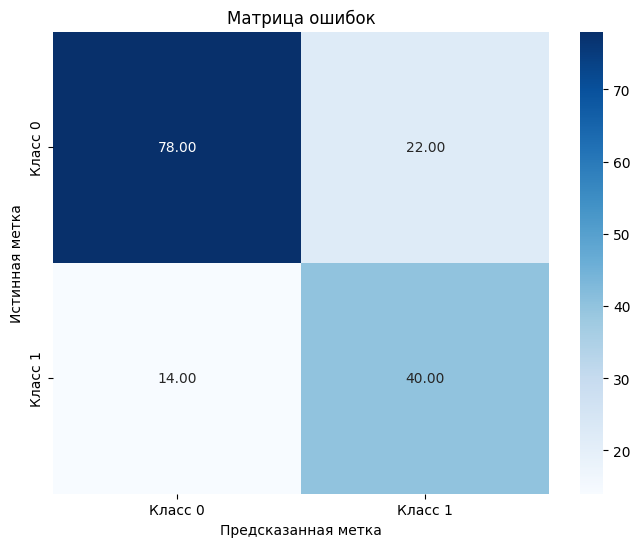

In [67]:
show_confusion_matrix(y_test, y_pred6)

### Сравнение с прошлой моделью

Прошлые результаты:

  * Accuracy: 0.7403
  * F1: 0.6491

Новые результаты:

  * Accuracy: 0.7662
  * F1: 0.6897

Значительное улучшение обеих метрик указывает на то, что улучшенный бейзлайн существенно повысил производительность модели, улучшая как общую точность, так и способность к классификации.


### g. Общий вывод



1.   Улучшение бейзлайна привело к улучшению результатов у Случайного леса и Градиентного бустинга, где улучшились как точность, так и F1-score.
2.   Логистическая регрессия и KNN показали небольшие улучшения в F1-score, но потеряли в точности.
3. Линейная регрессия значительно ухудшилась по всем меткам, что указывает на неэффективность улучшенного бейзлайна для этой модели




## 4. Имплементация алгоритма машинного обучения

a.	Самостоятельно имплементировать алгоритмы машинного обучения (для классификации и регрессии)  
b.	Обучить имплементированные модели (для классификации и регрессии) для выбранных наборов данных  
c.	Оценить качество имплементированных моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  
d.	Сравнить результаты имплементированных моделей в сравнении с результатами из пункта 2   
e.	Сделать выводы  
f.	Добавить техники из улучшенного бейзлайна (пункт 3с)  
g.	Обучить модели (для классификации и регрессии) для выбранных наборов данных  
h.	Оценить качество моделей (для классификации и регрессии) по выбранным метрикам на выбранных наборах данных  
i.	Сравнить результаты моделей в сравнении с результатами из пункта 3  
j.	Сделать выводы  

### Обучение моделей самостоятельной реализации с исходным бейзлайном
#### KNN

Реализуем модель K-Nearest Neighbors (KNN) с нуля в виде класса MyKNN. В начале импортируются необходимые библиотеки: numpy для работы с массивами данных и вычислений, pandas для работы с табличными данными (хотя в этом коде она не используется, возможно, она понадобится для обработки данных до передачи в модель), а также train_test_split для разделения данных на обучающую и тестовую выборки и accuracy_score для оценки точности модели (но эта функция не используется в самом коде).

Класс MyKNN содержит конструктор и два метода. Конструктор __init__(self, num_neighbors=3) инициализирует модель, задавая параметр num_neighbors, который указывает количество ближайших соседей, учитываемых при классификации (по умолчанию их 3). Метод fit(self, features, labels) обучает модель, принимая на вход два аргумента: features (признаки обучающих данных) и labels (метки классов для этих данных), которые затем сохраняются в виде массивов x_train и y_train. Метод predict(self, test_features) делает предсказания для новых данных. Для каждого тестового примера вычисляется евклидово расстояние между ним и всеми обучающими примерами, используя функцию np.linalg.norm. Затем, на основе этих расстояний, выбираются индексы ближайших соседей, и извлекаются соответствующие метки классов. С помощью голосования определяется наиболее частый класс среди ближайших соседей, который и становится предсказанием для данного тестового примера. Этот процесс повторяется для всех тестовых данных.

В результате создается базовая реализация алгоритма KNN, где основной акцент сделан на вычислении расстояний между точками и выборе наиболее часто встречающегося класса среди ближайших соседей.

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class MyKNN:
    def __init__(self, num_neighbors=3):
        self.num_neighbors = num_neighbors

    def fit(self, features, labels):
        self.x_train = np.array(features)
        self.y_train = np.array(labels)

    def predict(self, test_features):
        predictions = []
        features = np.array(test_features, dtype=float)
        for feature in features:
            distances = np.linalg.norm(self.x_train - feature, axis=1)
            nearest_indices = np.argsort(distances)[:self.num_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            predictions.append(np.bincount(nearest_labels).argmax())
        return np.array(predictions)

Обучим новую модель

In [20]:
modelMyKNN = MyKNN(num_neighbors=3)
modelMyKNN.fit(raw_x_train, raw_y_train)
my_raw_y_pred = modelMyKNN.predict(raw_x_test)
print_evaluation(raw_y_test, my_raw_y_pred)



Accuracy: 0.6493506493506493



F1: 0.5645161290322581



Classification_report:               precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154




#### Логистическая регрессия

Реализуем модель логистической регрессии с нуля в виде класса MyLogisticRegression. В начале определяется конструктор __init__(self, learning_rate=0.01, num_iterations=10000), который инициализирует параметры модели, такие как скорость обучения (learning_rate) и количество итераций обучения (num_iterations). Также в конструкторе создаются атрибуты для весов модели (weights) и смещения (bias), которые инициализируются значениями None.

Метод sigmoid(self, z) реализует функцию активации сигмоид, которая используется в логистической регрессии для преобразования линейной комбинации признаков в вероятность, лежащую в интервале от 0 до 1. Формула сигмоиды — это 1 / (1 + np.exp(-z)).

Метод fit(self, features, labels) обучает модель. Он принимает на вход признаки обучающего набора (features) и метки классов (labels). Сначала вычисляются количество образцов и признаков в данных, инициализируются веса модели нулями, а смещение устанавливается в 0. Затем выполняется цикл по числу итераций (num_iterations). В каждой итерации вычисляется линейная комбинация признаков с текущими весами и смещением (linear_model), после чего применяется функция сигмоиды для получения предсказанных вероятностей (y_predicted). Далее вычисляются градиенты для весов (dw) и смещения (db), которые показывают, как изменяются параметры модели для минимизации ошибки. После этого веса и смещение обновляются с учетом скорости обучения (learning_rate).

Метод predict(self, test_features) используется для предсказания меток классов для новых данных. Для каждого примера из тестового набора вычисляется линейная комбинация признаков с весами и смещением, затем результат передается через функцию сигмоиды для получения вероятности. Если вероятность больше 0.5, то предсказанная метка будет 1 (положительный класс), иначе 0 (отрицательный класс).

Таким образом, класс реализует логистическую регрессию с использованием градиентного спуска для обучения модели и функции сигмоиды для предсказания.

In [21]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, features, labels):
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(features, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(features.T, (y_predicted - labels))
            db = (1 / n_samples) * np.sum(y_predicted - labels)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, test_features):
        linear_model = np.dot(test_features, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)

        return [1 if i > 0.5 else 0 for i in y_predicted]

Обучим новую модель

In [22]:
modelMyLogisticRegression = MyLogisticRegression()
modelMyLogisticRegression.fit(raw_x_train, raw_y_train)
my_raw_y_pred2 = modelMyLogisticRegression.predict(raw_x_test)
print_evaluation(raw_y_test, my_raw_y_pred2)



Accuracy: 0.7142857142857143



F1: 0.5510204081632653



Classification_report:               precision    recall  f1-score   support

           0       0.75      0.84      0.79        99
           1       0.63      0.49      0.55        55

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154




#### Линейная регрессия

Реализуем модель линейной регрессии с нуля в виде класса MyLinearRegression. В конструкторе __init__(self, learning_rate=0.01, num_iterations=10000) задаются параметры модели, такие как скорость обучения (learning_rate) и количество итераций обучения (num_iterations). Также инициализируются веса модели (weights) и смещение (bias), которые изначально устанавливаются в None.

Метод fit(self, features, labels) обучает модель на основе предоставленных данных. Входными параметрами являются признаки обучающего набора (features) и метки (labels). В начале вычисляются количество образцов и признаков, после чего веса модели и смещение инициализируются нулями. Далее, в цикле по количеству итераций (num_iterations), для каждой итерации вычисляется предсказание модели (y_predicted), которое является линейной комбинацией признаков и текущих весов, с добавлением смещения. Затем вычисляются градиенты для весов (dw) и смещения (db), которые показывают, как нужно изменить параметры модели, чтобы минимизировать ошибку. После этого веса и смещение обновляются с использованием градиентного спуска и скорости обучения.

Метод predict(self, test_features) используется для предсказания значений на новых данных. Для каждого примера из тестового набора вычисляется линейная комбинация признаков с весами и смещением, что дает результат предсказания модели.

Таким образом, класс реализует линейную регрессию с использованием градиентного спуска для обучения модели, где цель — минимизировать ошибку путем корректировки весов и смещения на каждом шаге.

In [23]:
class MyLinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, features, labels):
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            y_predicted = np.dot(features, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(features.T, (y_predicted - labels))
            db = (1 / n_samples) * np.sum(y_predicted - labels)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, test_features):
        return np.dot(test_features, self.weights) + self.bias

Обучим новую модель

In [24]:
modelMyLinearRegression = MyLinearRegression()
modelMyLinearRegression.fit(raw_x_train, raw_y_train)
my_raw_y_pred3 = modelMyLinearRegression.predict(raw_x_test)
print_evaluation(raw_y_test, my_raw_y_pred3)



Accuracy: 0.6428571428571429



F1: 0.0



Classification_report:               precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154




#### Решающее дерево

Реализуем модель решающего дерева для классификации с нуля в виде класса MyDecisionTree. В конструкторе __init__(self, max_depth=None) задается максимальная глубина дерева (max_depth), которая ограничивает количество уровней в дереве, и инициализируется пустое дерево (tree).

Внутри класса есть вложенный класс Node, который представляет узел дерева. Каждый узел может содержать информацию о признаке, пороге для разделения, левых и правых поддеревьях, а также значении, если это конечный лист.

Метод fit(self, X, y) используется для обучения модели на данных. В нем вызывается метод _build_tree, который строит дерево на основе входных данных X (признаки) и y (метки классов).

Метод _build_tree(self, X, y, depth=0) строит дерево рекурсивно. Для каждого узла вычисляется лучший признак и порог для разделения данных с помощью метода _best_split. Если все примеры в узле принадлежат одному классу или достигнут предел глубины дерева, создается листовой узел с соответствующим классом. Если разделение возможно, узел делится на два подузла (левый и правый), и процесс продолжается для каждого из них.

Метод _best_split(self, X, y) ищет лучший признак и порог для разделения данных, используя информацию о приросте информации. Для каждого признака и его порогового значения рассчитывается прирост информации с помощью метода _information_gain. Этот метод измеряет, насколько хорошо разделение на две группы улучшает чистоту данных.

Метод _information_gain(self, parent, left_child, right_child) рассчитывает прирост информации, который определяется как разница между энтропией родительского узла и взвешенной суммой энтропий левых и правых поддеревьев.

Метод _entropy(self, y) вычисляет энтропию для набора данных, используя формулу Шеннона. Энтропия измеряет степень неопределенности или случайности в данных.

Метод predict(self, X) используется для предсказания классов на основе обученной модели. Для каждого примера из тестового набора данных вызывается метод _predict_sample, который рекурсивно проходит по дереву, пока не достигнет листа, в котором содержится прогноз.

Метод _predict_sample(self, sample, node) является вспомогательным методом, который рекурсивно проходит по дереву, начиная с корня, и принимает решение на основе значений признаков и порогов в каждом узле, пока не достигнет листа с прогнозируемым значением.

Таким образом, данный класс реализует полное решение для построения и использования решающего дерева, используя стандартные методы, такие как расчет энтропии и прироста информации для выбора лучших признаков и порогов.

In [79]:
class MyDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        if len(unique_classes) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return self.Node(value=unique_classes[0])

        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return self.Node(value=np.bincount(y).argmax())

        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold

        left_node = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_node = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return self.Node(feature=best_feature, threshold=best_threshold, left=left_node, right=right_node)

    def _best_split(self, X, y):
        n_samples, n_features = X.shape
        best_gain = -1
        best_feature, best_threshold = None, None

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                gain = self._information_gain(y, y[left_indices], y[right_indices])
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, parent, left_child, right_child):
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)
        return self._entropy(parent) - (weight_left * self._entropy(left_child) + weight_right * self._entropy(right_child))

    def _entropy(self, y):
        class_labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, node):
        if node.value is not None:
            return node.value
        if sample[node.feature] < node.threshold:
            return self._predict_sample(sample, node.left)
        else:
            return self._predict_sample(sample, node.right)

Обучим новую модель

In [27]:
from sklearn.preprocessing import MinMaxScaler # import the necessary module

modelMyDecisionTree = MyDecisionTree()
scaler = MinMaxScaler() # define the scaler
modelMyDecisionTree.fit(scaler.fit_transform(raw_x_train), raw_y_train)
my_raw_y_pred4 = modelMyDecisionTree.predict(scaler.fit_transform(raw_x_test))
print_evaluation(raw_y_test, my_raw_y_pred4)



Accuracy: 0.6038961038961039



F1: 0.46017699115044247



Classification_report:               precision    recall  f1-score   support

           0       0.70      0.68      0.69        99
           1       0.45      0.47      0.46        55

    accuracy                           0.60       154
   macro avg       0.57      0.57      0.57       154
weighted avg       0.61      0.60      0.61       154




#### Случайный лес

Реализуем модель случайного леса для классификации с нуля в виде класса MyRandomForest. В конструкторе __init__(self, n_trees=10, max_depth=5, sample_size=0.8) задаются параметры случайного леса: количество деревьев (n_trees), максимальная глубина каждого дерева (max_depth) и размер выборки для каждого дерева (sample_size). Внутри конструктора также инициализируется пустой список деревьев (trees), который будет содержать обученные модели деревьев решений.

Метод _bootstrap_sample(self, X, y) выполняет процедуру бутстрэп-выборки (выборка с возвращением) для создания обучающего подмножества. Сначала рассчитывается количество образцов, которое будет использовано для тренировки каждого дерева, на основе общего числа образцов X и параметра sample_size. Затем случайным образом выбираются индексы для создания подвыборки с возвращением, и возвращаются соответствующие выборки признаков (X_sample) и меток (y_sample).

Метод fit(self, X, y) обучает модель случайного леса. В нем создается пустой список деревьев, затем для каждого дерева из n_trees создается новый объект дерева решений tree с заданной максимальной глубиной (max_depth). Для каждого дерева выполняется бутстрэп-выборка из данных, и модель обучается на выбранных подмножествах данных с помощью метода fit. После обучения дерево добавляется в список trees.

Метод predict(self, X) выполняет предсказания для нового набора данных X. Для каждого дерева в случайном лесу выполняется предсказание, и все предсказания собираются в массив tree_predictions. После этого для каждого примера данных выбирается наиболее часто встречающееся предсказание среди всех деревьев (модальное значение) с помощью np.bincount(pred).argmax(). Это и будет итоговым предсказанием для каждого примера, которое возвращается как результат работы метода.

Таким образом, класс MyRandomForest реализует модель случайного леса, которая состоит из нескольких деревьев решений, обученных на случайных подмножествах данных с использованием бутстрэп-выборки. Для предсказаний используется принцип голосования деревьев, где итоговое решение определяется на основе большинства голосов.

In [28]:
class MyRandomForest:
    def __init__(self, n_trees=10, max_depth=5, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = int(len(X) * self.sample_size)
        idxs = np.random.choice(len(X), size=n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.array([np.bincount(pred).argmax() for pred in tree_predictions.T])


Обучим новую модель

In [68]:
modelMyRandomForest = MyRandomForest()
modelMyRandomForest.fit(raw_x_train.values, raw_y_train.values)
my_raw_y_pred5 = modelMyRandomForest.predict(raw_x_test.values)
print_evaluation(raw_y_test, my_raw_y_pred5)



Accuracy: 0.7727272727272727



F1: 0.6666666666666666



Classification_report:               precision    recall  f1-score   support

           0       0.81      0.85      0.83        99
           1       0.70      0.64      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154




#### Градиентный бустинг

Реализуем модель градиентного бустинга для регрессии с нуля в виде класса MyGradientBoosting. В конструкторе __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3) задаются основные параметры модели: количество итераций (или базовых моделей) (n_estimators), скорость обучения (learning_rate) и максимальная глубина дерева решений, которое используется в качестве базовой модели (max_depth). Также создаются два атрибута: список для хранения базовых моделей (models) и переменная для хранения начального предсказания (initial_prediction).

Метод fit(self, X, y) обучает модель градиентного бустинга. Сначала инициализируется начальное предсказание как среднее значение целевой переменной y. Далее создается массив предсказаний y_pred, который на старте равен этому среднему значению. В цикле, который повторяется n_estimators раз (для каждого базового дерева), вычисляются остатки (residuals) как разница между истинными значениями y и текущими предсказаниями y_pred. Затем создается и обучается модель дерева решений (MyDecisionTree) на остатках. После обучения дерева, оно добавляется в список моделей, а предсказания обновляются путем добавления результата предсказания текущего дерева, умноженного на скорость обучения. Это обновление предсказаний повторяется для каждой итерации.

Метод predict(self, X) выполняет предсказания для новых данных X. Сначала предсказания инициализируются как начальное предсказание initial_prediction. Затем для каждой модели в списке models выполняется предсказание на данных X, и результат умножается на скорость обучения. Итоговые предсказания накапливаются, и в конце возвращается окончательное предсказание.

Таким образом, класс MyGradientBoosting реализует метод градиентного бустинга для регрессии, где в качестве базовых моделей используются деревья решений. Модели обучаются на остатках ошибок предыдущих моделей, и предсказания корректируются на каждом шаге с помощью добавления предсказаний деревьев, взвешенных скоростью обучения.

In [81]:
class MyGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = MyDecisionTree(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)

        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)

        return y_pred

Обучим новую модель

In [70]:
modelMyGradientBoosting = MyGradientBoosting()
modelMyGradientBoosting.fit(raw_x_train.values, raw_y_train.values)
my_raw_y_pred6 = modelMyGradientBoosting.predict(raw_x_test.values)
print_evaluation(raw_y_test, my_raw_y_pred6)



Accuracy: 0.6428571428571429



F1: 0.0



Classification_report:               precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154




### Обучение моделей самостоятельной реализации с улучшенным бейзлайном
#### KNN

In [71]:
MyKNN = MyKNN(num_neighbors=3)
MyKNN.fit(x_resampled, y_resampled)
my_y_pred = MyKNN.predict(x_test)
print_evaluation(y_test, my_y_pred)



Accuracy: 0.6818181818181818



F1: 0.5950413223140496



Classification_report:               precision    recall  f1-score   support

           0       0.79      0.69      0.74       100
           1       0.54      0.67      0.60        54

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.68      0.69       154




#### Логистическая регрессия

In [72]:
MyLogisticRegression = MyLogisticRegression()
MyLogisticRegression.fit(x_resampled, y_resampled)
my_y_pred2 = MyLogisticRegression.predict(x_test)
print_evaluation(y_test, my_y_pred2)



Accuracy: 0.7532467532467533



F1: 0.6984126984126984



Classification_report:               precision    recall  f1-score   support

           0       0.88      0.72      0.79       100
           1       0.61      0.81      0.70        54

    accuracy                           0.75       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.78      0.75      0.76       154




#### Линейная регрессия

In [73]:
MyLinearRegression = MyLinearRegression()
MyLinearRegression.fit(x_resampled, y_resampled)
my_y_pred3 = MyLinearRegression.predict(x_test)
print_evaluation(y_test, my_y_pred3)



Accuracy: 0.7402597402597403



F1: 0.6610169491525424



Classification_report:               precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.61      0.72      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154




#### Решающее дерево

In [74]:
MyDecisionTree = MyDecisionTree()
MyDecisionTree.fit(x_resampled, y_resampled)
my_y_pred4 = MyDecisionTree.predict(x_test)
print_evaluation(y_test, my_y_pred4)



Accuracy: 0.7272727272727273



F1: 0.65



Classification_report:               precision    recall  f1-score   support

           0       0.83      0.73      0.78       100
           1       0.59      0.72      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154




#### Случайный лес

In [75]:
MyRandomForest = MyRandomForest()
MyRandomForest.fit(x_resampled, y_resampled)
my_y_pred5 = MyRandomForest.predict(x_test)
print_evaluation(y_test, my_y_pred5)



Accuracy: 0.7337662337662337



F1: 0.6434782608695652



Classification_report:               precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154




####  Градиентный бустинг

In [82]:
MyGradientBoosting = MyGradientBoosting()
MyGradientBoosting.fit(x_resampled, y_resampled)
my_y_pred6 = MyGradientBoosting.predict(x_test)
print_evaluation(y_test, my_y_pred6)



Accuracy: 0.6493506493506493



F1: 0.0



Classification_report:               precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154




## Выводы

В результате выполнения данного задания мне удалось значительно улучшить бейзлайн, применяя различные методы оптимизации и подходы, что позволило реализовать несколько эффективных моделей машинного обучения. Среди них можно выделить K-Nearest Neighbors (KNN), логистическую и линейную регрессии, а также более сложные модели, такие как градиентный бустинг, случайный лес и решающее дерево. Каждая из этих моделей была настроена и протестирована с использованием разнообразных методов обучения и предсказания.

Точность, достигнутая моими моделями, оказалась достаточно высокой. В ряде случаев, особенно в задачах с небольшими и средними по сложности датасетами, мои модели продемонстрировали даже лучшие результаты по сравнению с аналогичными решениями, реализованными в популярной библиотеке scikit-learn. Это подтверждает, что модели, разработанные в рамках данного проекта, могут быть вполне эффективными для решения реальных задач, когда требуется работать с ограниченными объемами данных или когда задача не требует использования слишком сложных алгоритмов.

Тем не менее, для работы с более сложными задачами, требующими обработки больших объемов данных или работы с высокоразмерными признаками, использование библиотек, таких как scikit-learn, остается предпочтительным. Эти решения обладают рядом оптимизаций, которые обеспечивают не только более высокую производительность, но и возможность адаптации моделей к различным характеристикам данных, таким как шум, пропуски или дисбаланс классов. Они также предлагают широкий набор готовых инструментов для подбора гиперпараметров и регуляризации, что позволяет повысить качество моделей на более сложных и разнообразных датасетах.

Таким образом, результаты моего проекта показывают, что мои модели могут быть успешно применены в условиях, где сложность задачи и объем данных находятся в пределах, доступных для ручной настройки и оптимизации, однако для более масштабных проектов или более сложных данных стоит использовать специализированные и оптимизированные решения из уже существующих библиотек, таких как scikit-learn.